# Lab 2 - Probability and Statistics

Student Name: Parthasarathy Rajendiran <br>
Student ID: 8883828
<hr>

In [1]:
import pandas as pd
import numpy as np

## Part A

### Preprocessing

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Loading the dataset

In [12]:
df_lab2 = pd.read_csv('../../practical_labs/datasets/Lab_2/Lab2_dataset.csv')
display(df_lab2)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


Vectorization

In [13]:
corpus = df_lab2['text'].to_list()
display(corpus[:5])

["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",
 'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls',
 "Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers c

In [42]:
bag_of_words = CountVectorizer()
X = bag_of_words.fit_transform(corpus)
features = bag_of_words.get_feature_names_out()

print(X.shape)
print(features[-5:])
display(X.toarray())

(5171, 50447)
['zzn' 'zzo' 'zzocb' 'zzso' 'zzsyt']


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Train test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df_lab2['label_num'], test_size=0.2, random_state=8883828
)

In [40]:
print(f'The vectorized data is split into \ntrain dataset with {X_train.shape[0]} records and \ntest dataset with {X_test.shape[0]} records')

The vectorized data is split into 
train dataset with 4136 records and 
test dataset with 1035 records


### Model Training and Evaluation

Support Vector Classifier

In [32]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Gaussian Naive Bayse

In [33]:
from sklearn.naive_bayes import GaussianNB

dense_X_train = X_train.toarray()

gauss_nb_model = GaussianNB()
gauss_nb_model.fit(dense_X_train, y_train)

GaussianNB()

Multinomial Naive Bayse

In [27]:
from sklearn.naive_bayes import MultinomialNB

multi_nb_model = MultinomialNB()
multi_nb_model.fit(X_train, y_train)

MultinomialNB()

Model evaluation with test data

In [34]:
svc_pred = svc_model.predict(X_test)
guass_nb_pred = gauss_nb_model.predict(X_test.toarray())
multi_nb_pred = multi_nb_model.predict(X_test)

Model Comparision

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

results = {}
for mdl_name, y_pred in [
    ('SVC', svc_pred),
    ('GaussianNB', guass_nb_pred),
    ('MultinomialNB', multi_nb_pred)
]:
    results[mdl_name] = {
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred)
    }
results_df = pd.DataFrame(results).T
display(results_df)

,precision,recall,f1_score,accuracy
SVC,0.930723,0.953704,0.942073,0.963285
GaussianNB,0.966102,0.879630,0.920840,0.952657
MultinomialNB,0.965944,0.962963,0.964451,0.977778


Based on the above metrics, Multinomial Naive bayse has the better accuracy than other two models.

There may be multiple reasons for these metrics. <br>
First of all, the assumptions of the models are different. Gaussian model assumes that the data for the given class follows a Gaussian (normal) distribution whereas, the multinomial model just estimates the probability of observing counts among a fixed, discrete set of categories.

The differences may be becuase of overfitting or hyperparameters also. So it is better to choose the model after hyperparameter tuning and cross validations.

## Part B

Loading the data

In [45]:
df_ab = pd.read_csv('../../practical_labs/datasets/Lab_2/AB_NYC_2019.csv')
print(df_ab.shape)
display(df_ab.head(3))

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Exploratory Analysis on the interested columm "price"

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
df_ab['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

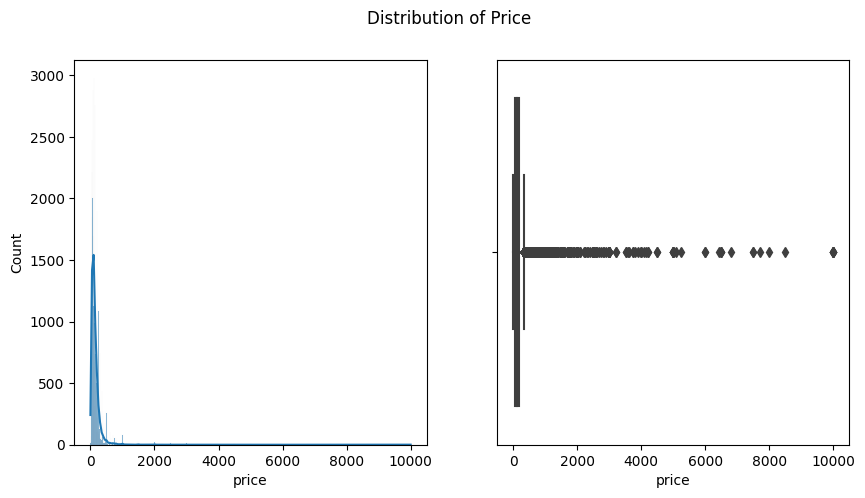

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(x=df_ab['price'], kde=True, ax=axes[0])
sns.boxplot(data=df_ab, x='price', ax=axes[1])
plt.suptitle('Distribution of Price')
plt.show()

The EDA confirms the evidence of outliers

### z-score approach

In [76]:
# Calculating z-score for price column
df_ab['z_score'] = (df_ab['price'] - df_ab['price'].mean()) / df_ab['price'].std()

# Flagging outliers which are apart the threshold 3 (which are not inside -3𝜎 to +3𝜎)
df_ab['z_scr_outlier'] = np.abs(df_ab['z_score']) > 3

display(df_ab['z_scr_outlier'].value_counts())

z_scr_outlier
False    48507
True       388
Name: count, dtype: int64

### whiskers approach

In [72]:
Q1 = df_ab['price'].quantile(0.25)
Q3 = df_ab['price'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
print(f'{IQR = }\n{lower_fence = }\n{upper_fence = }')

# Flagging outliers which are apart 1.5 * IQR
df_ab['whiskers_outlier'] = (df_ab['price'] < lower_fence) | (df_ab['price'] > upper_fence)

display(df_ab['whiskers_outlier'].value_counts())

IQR = 106.0
lower_fence = -90.0
upper_fence = 334.0


whiskers_outlier
False    45923
True      2972
Name: count, dtype: int64

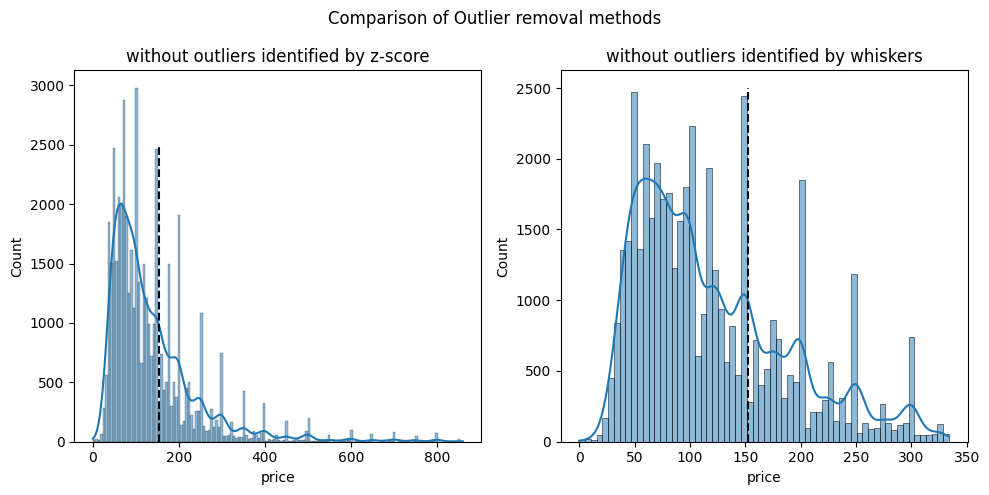

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

mean_price = df_ab['price'].mean()
sns.histplot(x=df_ab[~df_ab['z_scr_outlier']]['price'], kde=True, ax=axes[0])
axes[0].plot([mean_price, mean_price], [0, 2500], color='black', linestyle='--')
axes[0].set_title('without outliers identified by z-score')
sns.histplot(x=df_ab[~df_ab['whiskers_outlier']]['price'], kde=True, ax=axes[1])
axes[1].plot([mean_price, mean_price], [0, 2500], color='black', linestyle='--')
axes[1].set_title('without outliers identified by whiskers')
plt.suptitle('Comparison of Outlier removal methods')
fig.tight_layout()
plt.show()

Conclusion:  

With the above comparison, we can observe that the z-score method is identifying only the extreme outliers and the whiskers method is identifying the mild outliers as well.<br>
The z-score method cannot be used in many cases as after removing this also, the distribution is heavily skewed. <br>
whereas, in the whiskers method, the data is more or less evenly spead across the mean. <hr>